<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP4/TP4_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

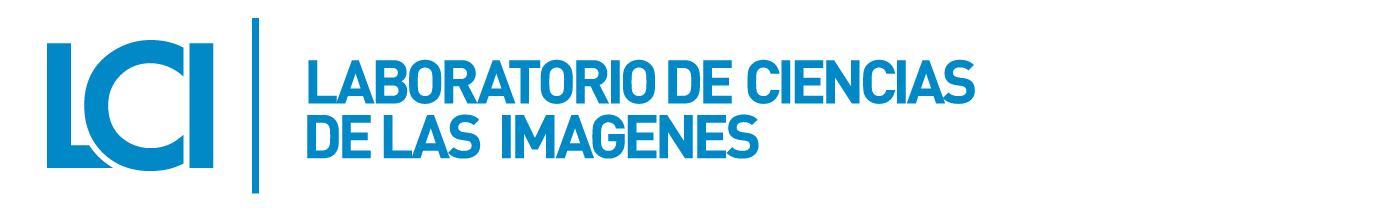

#Práctica 4: Conjunto de Juliá y Mandelbrot

##Presentado por: Ronny Guevara

## Objetivo General
Desarrollar un aplicativo que permita visualizar el conjunto de Mandelbrot y el Juliá asociado.
## Objetivos Específicos
*   Desarrollar aplicativos que permita visualizar diferentes iteraciones en el plano complejo
*   Desarrollar un aplicativo que permita visualizar el conjunto de Mandelbrot con zoom
*   Visualizar los resultados

###Problema
Implementar un explorador como el mostrado, que permita evaluar el
CM con zoom, ver el Juliá asociado en un punto. 
 
Experimentar con diferentes paletas (por ejemplo R-> cantidad de
iteraciones, G-> parte real, B-> parte imaginaria).

Explorar otras iteraciones en el plano complejo: (z3, ez, cos(z), etc.).


##Desarrollo
El desarrollo se divide en 2 etapas, la primera tiene como objetivo la computación de iteraciones en el plano complejo.
En la segunda etapa, se traza el conjunto de Juliá y Mandelbrot que permite evaluar con zoom.

##Primera Etapa

In [ ]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
def mandelbrot1(re, im, max_iter):
  c = complex(re, im) #
  z = 0.0 + 0.0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z = z * z + c
    m = abs(z)
    if m >=4:
      return i
  return max_iter

In [18]:
def mandelbrot2(re, im, max_iter):
  c = complex(re, im) #
  z = 0.0 + 0.0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z = z * z * z + c
    m = abs(z)
    if m >=4:
      return i
  return max_iter

In [21]:
def mandelbrot3(re, im, max_iter):
  c = complex(re, im) #
  z = 0.0 + 0.0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z = np.cos(z) + c
    m = abs(z)
    if m >=4:
      return i
  return max_iter

In [23]:
def mandelbrot4(re, im, max_iter):
  c = complex(re, im) #
  z = 0.0 + 0.0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z = np.exp(z) + c
    m = abs(z)
    if m >=4:
      return i
  return max_iter

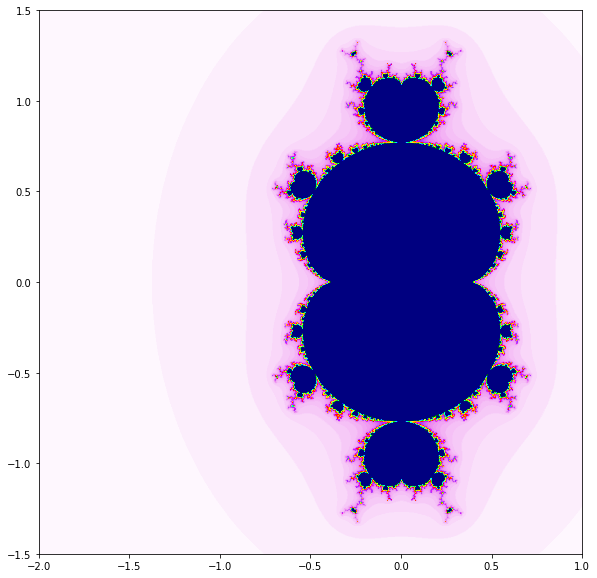

In [31]:
#@title Resultados { run: "auto" }
Arithmetic_Operation = 'z*z*z+c' #@param ["z*z+c", "z*z*z+c","cos(z)+c", "e(z)+c"]
columnas = 1000
filas = 1000
plano = np.zeros([filas,columnas])
plt.figure(figsize=(12, 10))
for indice_fila, re in enumerate(np.linspace(-2,1,num=filas)):
  for indice_columna, im in enumerate(np.linspace(-1.5,1.5,num=columnas)):
    if Arithmetic_Operation == 'z*z+c':
      plano [indice_columna,indice_fila] = mandelbrot1(re,im,100)
    elif Arithmetic_Operation == 'z*z*z+c':
      plano [indice_columna,indice_fila] = mandelbrot2(re,im,100)
    elif Arithmetic_Operation == 'cos(z)+c':
      plano [indice_columna,indice_fila] = mandelbrot3(re,im,100)
    elif Arithmetic_Operation == 'e(z)+c':
      plano [indice_columna,indice_fila] = mandelbrot4(re,im,100)

plt.imshow(plano,cmap='gist_ncar_r', extent = [-2,1,-1.5,1.5])
plt.show()

##Segunda Etapa
La segunda etapa debe ser ejecutada en Spyder versión 5.3.0 y se subdivide en 2 programas, siendos estos:


*   Conjunto de Julia utilizando programación orientada a objetos (POO): permite al usuario realizar zoom con el scroll del mouse, y visualizar el Julia asociado para cualquier punto dando clic izquierdo
*   Conjunto de Julia de dibujo interactivo: se implementa un panel principal permite al usuario ingresar el número de repeticiones e iteraciones, el botón Submit que permite realizar el plot del conjunto de Mandelbrot, visualización del conjunto de Julia en cualquier punto al dar clic izquierdo y el zoom respectivo con el scroll del mouse.


###Conjunto de Julia utilizando programación orientada a objetos (POO)

In [ ]:
from tkinter import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import matplotlib.backend_bases as mbb
import time

class MandelBrot():
    def __init__(self,x0,x1,y0,y1,n):
        self.oriAxis = np.array([x0,x1,y0,y1])
        self.axis = self.oriAxis
        self.nx,self.ny,self.nMax = n,n,n               
        self.nIter = 100
        self.n0 = 0
        self.z = genZ(self.oriAxis,self.nx,self.ny)
        self.DrawMandelbrot()

    def DrawMandelbrot(self):
        mBrot = getJulia(self.z,self.z,self.nIter)
        
        self.fig, ax = plt.subplots()
        plt.imshow(mBrot, cmap='gist_ncar_r', extent=self.axis)
        plt.gca().set_axis_off()
        
        self.fig.canvas.mpl_disconnect(self.fig.canvas.manager.key_press_handler_id)
        self.fig.canvas.mpl_connect('button_press_event', self.OnMouse)
        self.fig.canvas.mpl_connect('button_release_event', self.OnRelease)
        self.fig.canvas.mpl_connect('scroll_event', self.OnScroll)
        
        plt.show()

    def DrawJulia(self,c0):

        z = genZ([-2,2,-2,2],800,800)
        julia = getJulia(z,c0,self.nIter)
        
        jFig,jAx = plt.subplots()
        plt.cla()
        plt.imshow(julia, cmap='gist_ncar_r', extent=self.axis)
        plt.gca().set_axis_off()
        plt.show()
        jFig.canvas.draw_idle()
	
	#Roller zoom
    def OnScroll(self,evt):
        x0,y0 = evt.xdata,evt.ydata

        if evt.button == "up":
            self.axis = (self.axis+[x0,x0,y0,y0])/2
        elif evt.button == 'down':
            self.axis = 2*self.axis-[x0,x0,y0,y0]

        z = genZ(self.axis,self.nx,self.ny)
        mBrot = getJulia(z,z,self.nIter)
        plt.cla()
        plt.imshow(mBrot, cmap='gist_ncar_r', extent=self.axis)
        plt.gca().set_axis_off()
        
        mBrot[mBrot<1]==self.n0+self.nIter
        self.n0 = int(np.min(mBrot))
        self.fig.canvas.draw_idle()
        pass

    def OnMouse(self, evt):
        self.xStart = evt.xdata
        self.yStart = evt.ydata
        self.fig.canvas.draw_idle()
    
    def OnRelease(self,evt):
        x0,y0,x1,y1 = self.xStart,self.yStart,evt.xdata,evt.ydata
        if evt.button == mbb.MouseButton.LEFT:
            self.DrawJulia(x1+y1*1j)		#Si la liberación es el botón izquierdo, luego dibuja el conjunto de Julia y regresa
            return
        # Haga clic con el botón derecho y arrastre, puede acercar el conjunto de Mandelbrot
        self.axis = np.array([min(x0,x1),max(x0,x1),
                             min(y0,y1),max(y0,y1)])
        
        nxny = self.axis[[1,3]]-self.axis[[0,2]]
        self.nx,self.ny = (nxny/max(nxny)*self.nMax).astype(int)
        z = genZ(self.axis,self.nx,self.ny)

        n = 100     #n es el número de iteraciones
        mBrot = getJulia(z,z,n)
        plt.cla()
        plt.imshow(mBrot, cmap='gist_ncar_r', extent=self.axis)
        plt.gca().set_axis_off()
        
        mBrot[mBrot<1]==self.n0+n
        self.n0 = int(np.min(mBrot))
        self.fig.canvas.draw_idle()

def genZ(axis,nx,ny):
    x0,x1,y0,y1 = axis
    x = np.linspace(x0,x1,nx)
    y = np.linspace(y0,y1,ny)
    real, img = np.meshgrid(x,y)
    z = real + img*1j
    return z

def getJulia(z,c,n,n0=0,m=2):
    t = time.time()
    c = np.zeros_like(z)+c
    out = abs(z)
    for _ in range(n0):
        z = z*z + c
    for i in range(n0,n0+n):
        absz = abs(z)
        z[absz>m]=0
        c[absz>m]=0
        out[absz>m]=i
        z = z*z + c
    print("time:",time.time()-t)
    return out

if __name__ == "__main__":
    x,y = 0,0
    brot = MandelBrot(-2,1,-1.5,1.5,1000)

###Conjunto de Julia de dibujo interactivo

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib import cm
from tkinter import *
import matplotlib.backend_bases as mbb

def valores():
    value=my_entry.get()
    value = int(value)
    value2=my_entry2.get()
    value2 = int(value2)
    return(value,value2)

#Generar coordenadas z
def genZ(axis,nx,ny):
    x0,x1,y0,y1 = axis
    x = np.linspace(x0,x1,nx)
    y = np.linspace(y0,y1,ny)
    real, img = np.meshgrid(x,y)
    z = real + img*1j
    return z

#Trazo de Julia
def getJulia(z,c,n,m=2):#m es el punto de divergencia de juicio, que es mayor que 1
    t = time.time()
    c = np.zeros_like(z)+c
    out = abs(z)
    for i in range(n):
        absz = abs(z)
        z[absz>m]=0		#0 punto donde comienza a la divergencia
        c[absz>m]=0		
        out[absz>m]=i	# Registre la velocidad de divergencia del punto de divergencia
        z = z*z + c
    print("time:",time.time()-t)
    return out

def test(evt):
    value, value2=valores()
    print(evt.xdata, evt.ydata)
    x0, y0 = evt.xdata, evt.ydata
    if evt.button == mbb.MouseButton.LEFT:
        axis = np.array([-2,1,-1.5,1.5])
        inc = (x0+y0*1j)
        z = genZ([-2,2,-2,2],value,value)
        julia = getJulia(z,inc,value2)
        jFig,jAx = plt.subplots()
        plt.cla()
        plt.imshow(julia, cmap='gist_ncar_r', extent=axis)
        plt.gca().set_axis_on()
        plt.show()
        jFig.canvas.draw_idle()
        return
    
    axis = np.array([min(x0,x0-0.5),max(x0,x0-0.5),
                         min(y0,y0+0.5),max(y0,y0+0.5)])
    nxny = axis[[1,3]]-axis[[0,2]]
    nx,ny = (nxny/max(nxny)*value).astype(int)
    z = genZ(axis,nx,ny)

    n0=0

    mBrot = getJulia(z,z,value2)
    jFig,jAx = plt.subplots()
    plt.cla()
    plt.imshow(mBrot, cmap='gist_ncar_r', extent=axis)
    plt.gca().set_axis_off()
        
    mBrot[mBrot<1]==n0+n
    n0 = int(np.min(mBrot))
    jFig.canvas.draw_idle()
    
def test2(evt):
    value, value2=valores()
    print(evt.xdata, evt.ydata)
    x0, y0 = evt.xdata, evt.ydata
    axis = np.array([-2,1,-1.5,1.5])
    if evt.button == "up":
        axis = (axis+[x0,x0,y0,y0])/2
    elif evt.button == 'down':
        axis = 2*axis-[x0,x0,y0,y0]
        
    jFig,jAx = plt.subplots()
    z = genZ(axis,value,value)
    mbrot = getJulia(z,z,value2)
    plt.clf()
    plt.imshow(mbrot, cmap='gist_ncar_r', extent=axis)
    plt.gca().set_axis_on()

    n0=0
    mbrot[mbrot<1]==n0+value
    n0 = int(np.min(mbrot))
    jFig.canvas.draw_idle()
    pass

def retrieve():
    value=my_entry.get()
    value = int(value)
    value2=my_entry2.get()
    value2 = int(value2)
    axis = np.array([-2,1,-1.5,1.5])
    z0 = genZ(axis,value,value)
    mBrot = getJulia(z0,z0,value2)
    fig, ax = plt.subplots()
    fig.canvas.mpl_disconnect(
    	fig.canvas.manager.key_press_handler_id)
    fig.canvas.mpl_connect('button_press_event', test)
    fig.canvas.mpl_connect('scroll_event', test2)
    plt.imshow(mBrot, cmap='gist_ncar_r', extent=axis)
    plt.gca().set_axis_on()
    plt.show()
    return()
 
def salir():
    ventana.destroy()
    
ventana = Tk()
ventana.geometry("300x160")
ventana.title("Panel Principal")
frame = Frame(ventana)
frame.pack()

el = Label(frame, text = "Numero de repeticiones, máx=1000",
           bg = "blue", fg = "white")
el.pack()

my_entry = Entry(frame, width = 20)
my_entry.insert(0,0)
my_entry.pack(padx = 5, pady = 5)

la = Label(frame, text = "Numero de iteracciones, máx=100",
           bg = "blue", fg = "white")
la.pack()

my_entry2 = Entry(frame, width = 15)
my_entry2.insert(0,0)
my_entry2.pack(padx = 5, pady = 5)

ver = Button(frame, text = "Submit", command = retrieve)
ver.pack()

salir = Button(frame, text = "Salir", command = salir)
salir.pack()

ventana.mainloop()